In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def sampling(N):
    l=[]
    l=np.random.uniform(0,1,N)
    n1=len([i for i in l if (i<=0.15)])
    n2=len([i for i in l if (i >= 0.15 and i<=0.48)])
    n3=len([i for i in l if (i >= 0.48 and i<=0.83)])
    n4=len([i for i in l if (i >= 0.83 and i<1)])
    return n1,n2,n3,n4

n1,n2,n3,n4=sampling(1000)
print(n1,n2,n3,n4)

145 313 380 162


In [4]:
def linear_transformation(mu, cov, n):
    mean=[0,0,0]
    covariance=[[1,0,0],[0,1,0],[0,0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x

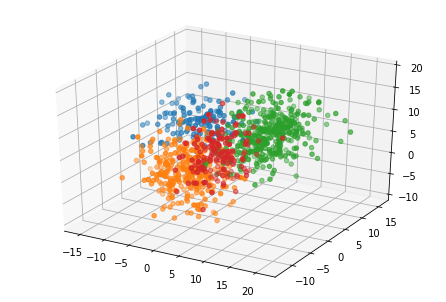

In [5]:
mu1=np.array([[-5,5,7]])
cov1=np.array([[16.5,0,3],[1,7,3],[1,3,5]])
x1=linear_transformation(mu1,cov1,n1).T

mu2=np.array([[-1,-3.5,1]])
cov2=np.array([[14.5,0,0.3],[0,10,0],[0,0,15]])
x2=linear_transformation(mu2,cov2,n2).T

mu3=np.array([[8,5.5,7]])
cov3=np.array([[15,1,3],[0,15,5],[5,1,15]])
x3=linear_transformation(mu3,cov3,n3).T

mu4=np.array([[6,-5.5,7]])
cov4=np.array([[7,-1,-3],[0,10,0],[0,0,15]])
x4=linear_transformation(mu4,cov4,n4).T

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1[:,0], x1[:,1], x1[:,2])

ax.scatter(x2[:,0], x2[:,1], x2[:,2])
ax.scatter(x3[:,0], x3[:,1], x3[:,2])
ax.scatter(x4[:,0], x4[:,1], x4[:,2])
#ax.view_init(0, 0)
plt.show()

In [6]:
def pdf(x, mu, cov):
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( math.pow((2*np.pi),float(2)/2) * math.pow(det,1.0/2) )
    x_mu = np.matrix(x - mu)
    inv = cov.I
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    return norm_const * result


In [7]:
pw1=0.15
pw2=0.33
pw3=0.40
pw4=0.17

def maximum(x):
    p1=pdf(np.matrix(x), mu1, np.matrix(cov1))*pw1
    p2=pdf(np.matrix(x), mu2, np.matrix(cov2))*pw2
    p3=pdf(np.matrix(x), mu3, np.matrix(cov3))*pw3
    p4=pdf(np.matrix(x), mu4, np.matrix(cov4))*pw4
    i=np.argmax(np.matrix([p1,p2,p3,p4]))
    return i+1
           

probability of error =  0.096


Text(0.5, 42.0, 'True Class Labels')

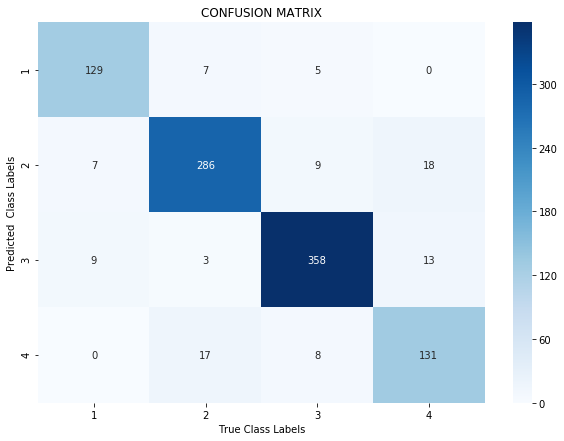

In [8]:
# x1=x1.T
# x2=x2.T
# x3=x3.T
res1=[]
res2=[]
res3=[]
res4=[]

err1_2=[]
err1_3=[]
err1_4=[]
err2_1=[]
err2_3=[]
err2_4=[]
err3_1=[]
err3_2=[]
err3_4=[]
err4_1=[]
err4_2=[]
err4_3=[]


for i in range(n1):
    if(maximum(x1[i,:])==1):
        res1.append(x1[i,:])
    elif(maximum(x1[i,:])==2):
        err1_2.append(x1[i,:])
    elif(maximum(x1[i,:])==3):
        err1_3.append(x1[i,:])
    else:
        err1_4.append(x1[i,:])
        

        
for i in range(n2):
    if(maximum(x2[i,:])==2):
        res2.append(x2[i,:])
    elif(maximum(x2[i,:])==1):
        err2_1.append(x2[i,:])
    elif(maximum(x2[i,:])==3):
        err2_3.append(x2[i,:])
    else:
        err2_4.append(x2[i,:])
        
for i in range(n3):
    if(maximum(x3[i,:])==3):
        res3.append(x3[i,:])
    elif(maximum(x3[i,:])==1):
        err3_1.append(x3[i,:])
    elif(maximum(x3[i,:])==2):
        err3_2.append(x3[i,:])
    else:
        err3_4.append(x3[i,:])

for i in range(n4):
    if(maximum(x4[i,:])==4):
        res4.append(x4[i,:])
    elif(maximum(x4[i,:])==1):
        err4_1.append(x4[i,:])
    elif(maximum(x4[i,:])==2):
        err4_2.append(x4[i,:])
    else:
        err4_3.append(x4[i,:])

P_error=(len(err1_2)+len(err1_3)+len(err1_4)+len(err2_1)+len(err2_3)+len(err2_4)+len(err3_1)+len(err3_2)+len(err3_4)+len(err4_1)+len(err4_2)+len(err4_3))/1000
print("probability of error = ", P_error)

import seaborn as sn
import pandas as pd

array=[[len(res1),len(err2_1),len(err3_1),len(err4_1)],
       [len(err1_2),len(res2),len(err3_2),len(err4_2)],
       [len(err1_3),len(err2_3),len(res3),len(err4_3)],
       [len(err1_4),len(err2_4),len(err3_4),len(res4)]]

df_cm = pd.DataFrame(array, index = [i for i in "1234"],
                  columns = [i for i in "1234"])
plt.figure(figsize = (10,7))

sn.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')
plt.title("CONFUSION MATRIX")
plt.ylabel("Predicted  Class Labels")
plt.xlabel("True Class Labels")

In [85]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

In [86]:
# Normalising the dataset values
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [87]:
# Split dataset into K-folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [196]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

from sklearn.model_selection import KFold

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    scores=list()
    kfold=KFold(n_folds, True, 1)
    for train_set, test_set in kfold.split(dataset):
        predicted=algorithm(dataset[train_set],dataset[test_set],*args)
        actual=[row[-1] for row in dataset[test_set]]
        accuracy=accuracy_metric(actual,predicted)
        scores.append(accuracy)
    return scores
        

In [197]:
## Multi Layer Perceptron

# Calculate neuron activation for an input
def activate(weights, inputs):
    
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
   
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
            
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
            
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer) 
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

### Dataset size-100


In [201]:
n1,n2,n3,n4=sampling(1000)
print(n1,n2,n3,n4)

a=linear_transformation(mu1,cov1,n1).T
b=linear_transformation(mu2,cov2,n2).T
c=linear_transformation(mu3,cov3,n3).T
d=linear_transformation(mu4,cov4,n4).T

target =np.zeros((1000,1))
    
dataset=np.vstack((np.vstack((a,b)),np.vstack((c,d))))
for i in range(1000):
    if(i<n1):
        target[i]=0
    elif(i>=n1 and i<n1+n2):
        target[i]=1
    elif(i>=n1+n2 and i<n1+n2+n3):
        target[i]=2
    else:
        target[i]=3
    
dataset=np.hstack((dataset,target))

144 321 341 194


In [206]:
seed(1)
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
n_folds = 10
l_rate = 0.1
n_epoch = 1000
n_hidden = 10

scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


Scores: [81.0, 85.0, 83.0, 80.0, 86.0, 87.0, 88.0, 82.0, 89.0, 88.0]
Mean Accuracy: 84.900%


In [ ]:
import pandas
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from tensorflow import keras

In [ ]:
print(0)